All datasets loaded.

Feature Importances for 2017:
Time_Period: 0.0652
Visibility (km): 0.0539
Temp (°C): 0.0511
Rel Hum (%): 0.0495
Wind Spd (km/h): 0.0487
Wind Dir (10s deg): 0.0485
Stn Press (kPa): 0.0481
Dew Point Temp (°C): 0.0473
C4D-1HA: 0.0371
Day_Of_Week: 0.0359
C3D-1HA: 0.0322
C4D-2HA: 0.0289
C4D-3HA: 0.0277
C5D-1HA: 0.0268
C4D-4HA: 0.0250
C2D-1HA: 0.0242
C3D-3HA: 0.0237
C5D-4HA: 0.0233
C3D-2HA: 0.0232
C5D-2HA: 0.0222
C2D-3HA: 0.0210
C3D-4HA: 0.0207
C2D-4HA: 0.0203
C5D-3HA: 0.0203
C2D-2HA: 0.0202
C0D-2HA: 0.0195
C0D-1HA: 0.0194
C1D-2HA: 0.0175
C0D-3HA: 0.0170
C1D-4HA: 0.0169
C0D-4HA: 0.0165
C1D-3HA: 0.0147
C1D-1HA: 0.0145
Is_Weekend: 0.0131
Is_Holiday: 0.0061

Feature Importances for 2018:
Time_Period: 0.0648
Stn Press (kPa): 0.0521
Temp (°C): 0.0504
Dew Point Temp (°C): 0.0502
Visibility (km): 0.0492
Wind Dir (10s deg): 0.0486
Rel Hum (%): 0.0474
Wind Spd (km/h): 0.0463
C5D-1HA: 0.0403
C5D-4HA: 0.0376
Day_Of_Week: 0.0370
C5D-2HA: 0.0302
C5D-3HA: 0.0285
C4D-1HA: 0.0282
C4D-2

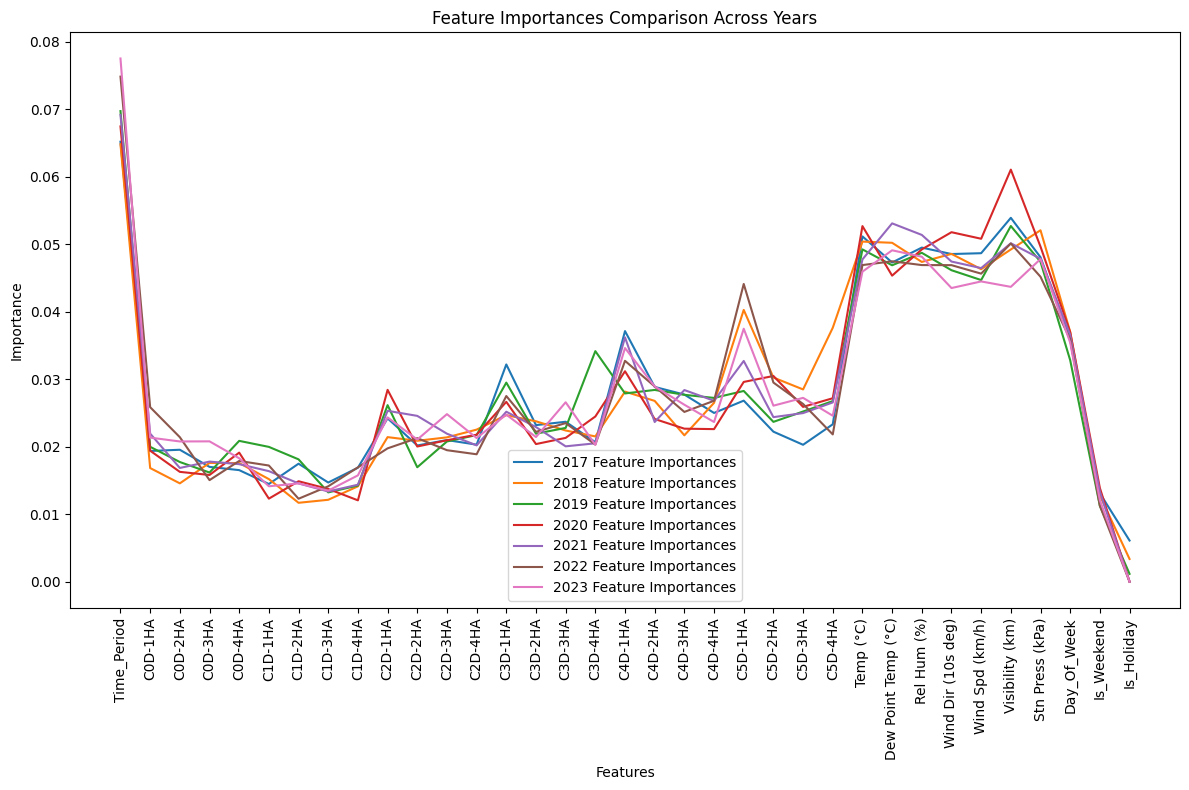

In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load All Datasets
all_files = sorted(glob.glob("xydata_*winter.csv"))  # Load all CSV files matching pattern

# Dictionary to store each year's dataset
data_dict = {}

for file in all_files:
    # Extract the year from the filename (e.g., 2017 from xydata_2017winter.csv)
    year = file.split('_')[1][:4]
    data_dict[year] = pd.read_csv(file)

print("All datasets loaded.")

# Step 2: Define Target and Features for Each Year
target_columns_clusters = [f"Cluster{i}" for i in range(6)]  # Target variables
columns_to_drop = target_columns_clusters + ["Date", "Total_Accidents"]  # Non-predictive columns

# Store feature importances for each year
feature_importances_dict = {}

for year, data in data_dict.items():
    # Extract target and features
    y = data[target_columns_clusters]  # Binary target
    X = data.drop(columns=columns_to_drop)  # Features

    # Step 3: Train Random Forest Classifier to Get Feature Importance
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)

    # Get feature importances and store in dictionary
    feature_importances = rf.feature_importances_
    feature_importances_dict[year] = feature_importances

    # Print feature importances for the current year
    sorted_indices = feature_importances.argsort()[::-1]
    print(f"\nFeature Importances for {year}:")
    for idx in sorted_indices:
        print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

# Step 4: Plot Feature Importances for Each Year for Comparison
# Get the feature names from one of the datasets
feature_names = X.columns

plt.figure(figsize=(12, 8))

for year, importances in feature_importances_dict.items():
    plt.plot(feature_names, importances, label=f"{year} Feature Importances")

plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances Comparison Across Years")
plt.legend()
plt.tight_layout()
plt.show()


All datasets loaded.

Feature Importances for 2017:
Time_Period: 0.0652
Visibility (km): 0.0539
Temp (°C): 0.0511
Rel Hum (%): 0.0495
Wind Spd (km/h): 0.0487
Wind Dir (10s deg): 0.0485
Stn Press (kPa): 0.0481
Dew Point Temp (°C): 0.0473
C4D-1HA: 0.0371
Day_Of_Week: 0.0359
C3D-1HA: 0.0322
C4D-2HA: 0.0289
C4D-3HA: 0.0277
C5D-1HA: 0.0268
C4D-4HA: 0.0250
C2D-1HA: 0.0242
C3D-3HA: 0.0237
C5D-4HA: 0.0233
C3D-2HA: 0.0232
C5D-2HA: 0.0222
C2D-3HA: 0.0210
C3D-4HA: 0.0207
C2D-4HA: 0.0203
C5D-3HA: 0.0203
C2D-2HA: 0.0202
C0D-2HA: 0.0195
C0D-1HA: 0.0194
C1D-2HA: 0.0175
C0D-3HA: 0.0170
C1D-4HA: 0.0169
C0D-4HA: 0.0165
C1D-3HA: 0.0147
C1D-1HA: 0.0145
Is_Weekend: 0.0131
Is_Holiday: 0.0061

Highly Correlated Features for 2017:


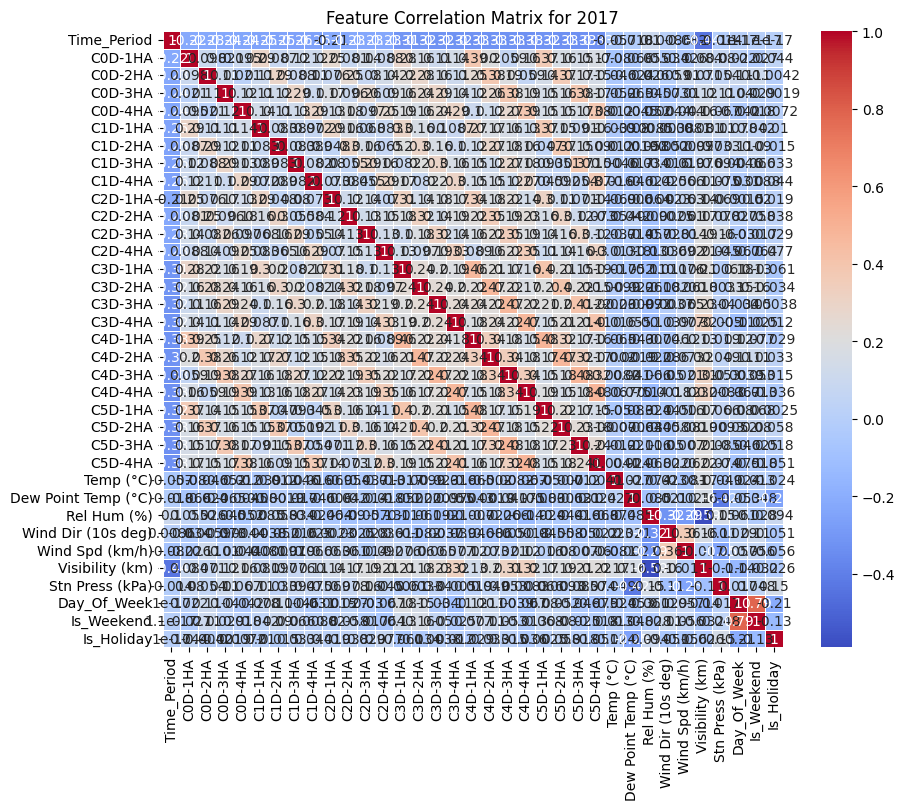


Feature Importances for 2018:
Time_Period: 0.0648
Stn Press (kPa): 0.0521
Temp (°C): 0.0504
Dew Point Temp (°C): 0.0502
Visibility (km): 0.0492
Wind Dir (10s deg): 0.0486
Rel Hum (%): 0.0474
Wind Spd (km/h): 0.0463
C5D-1HA: 0.0403
C5D-4HA: 0.0376
Day_Of_Week: 0.0370
C5D-2HA: 0.0302
C5D-3HA: 0.0285
C4D-1HA: 0.0282
C4D-2HA: 0.0268
C4D-4HA: 0.0265
C3D-1HA: 0.0247
C3D-2HA: 0.0238
C2D-4HA: 0.0225
C3D-3HA: 0.0224
C4D-3HA: 0.0217
C3D-4HA: 0.0215
C2D-1HA: 0.0214
C2D-3HA: 0.0214
C2D-2HA: 0.0209
C0D-3HA: 0.0176
C0D-4HA: 0.0176
C0D-1HA: 0.0168
C1D-1HA: 0.0152
C0D-2HA: 0.0146
C1D-4HA: 0.0141
Is_Weekend: 0.0128
C1D-3HA: 0.0121
C1D-2HA: 0.0117
Is_Holiday: 0.0034

Highly Correlated Features for 2018:


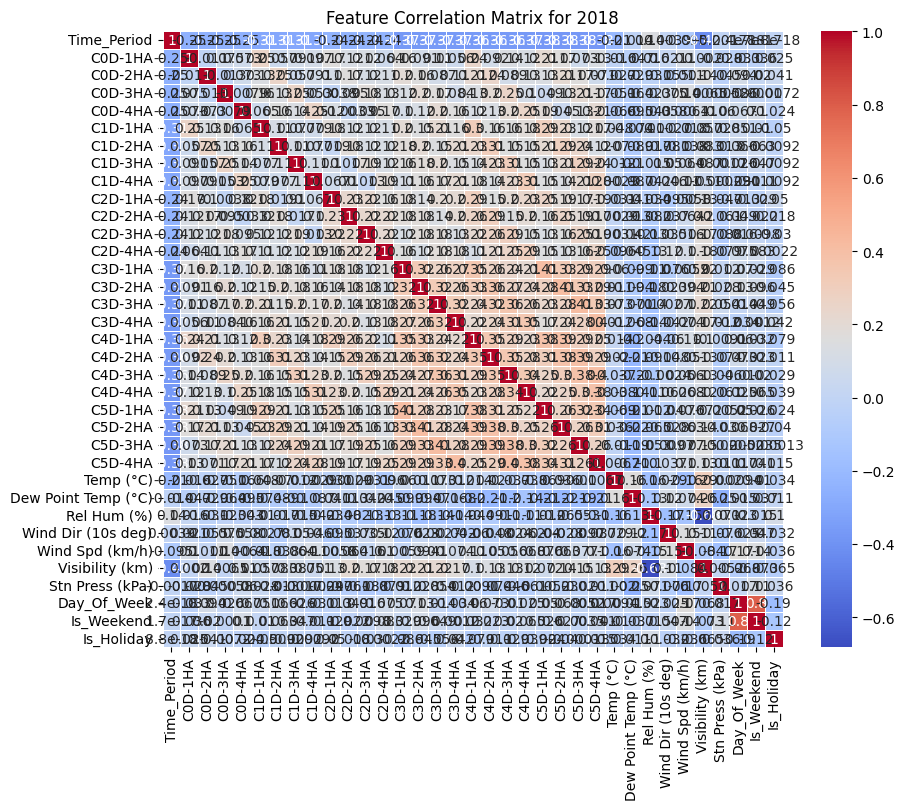


Feature Importances for 2019:
Time_Period: 0.0697
Visibility (km): 0.0527
Temp (°C): 0.0492
Rel Hum (%): 0.0487
Stn Press (kPa): 0.0474
Dew Point Temp (°C): 0.0469
Wind Dir (10s deg): 0.0461
Wind Spd (km/h): 0.0447
C3D-4HA: 0.0342
Day_Of_Week: 0.0328
C3D-1HA: 0.0295
C4D-2HA: 0.0284
C5D-1HA: 0.0283
C4D-1HA: 0.0279
C4D-3HA: 0.0277
C4D-4HA: 0.0272
C5D-4HA: 0.0268
C2D-1HA: 0.0262
C5D-3HA: 0.0252
C5D-2HA: 0.0237
C3D-3HA: 0.0228
C3D-2HA: 0.0219
C2D-4HA: 0.0217
C0D-4HA: 0.0209
C2D-3HA: 0.0208
C0D-1HA: 0.0200
C1D-1HA: 0.0200
C1D-2HA: 0.0181
C0D-2HA: 0.0177
C2D-2HA: 0.0170
C0D-3HA: 0.0162
C1D-4HA: 0.0142
C1D-3HA: 0.0132
Is_Weekend: 0.0112
Is_Holiday: 0.0012

Highly Correlated Features for 2019:


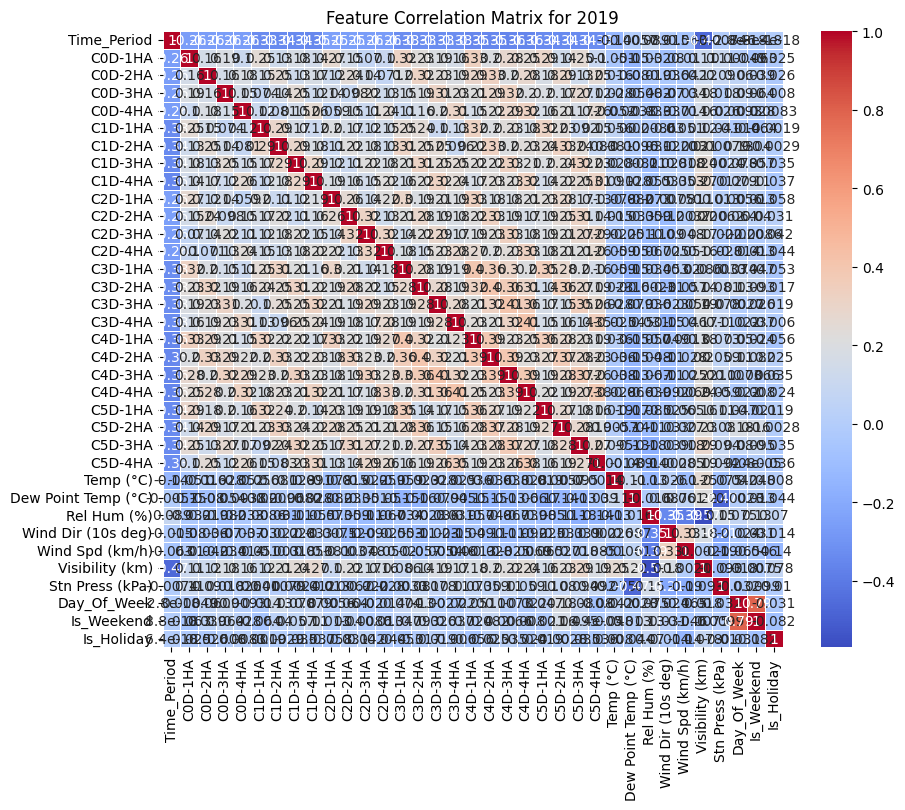


Feature Importances for 2020:
Time_Period: 0.0674
Visibility (km): 0.0610
Temp (°C): 0.0527
Wind Dir (10s deg): 0.0518
Wind Spd (km/h): 0.0508
Stn Press (kPa): 0.0496
Rel Hum (%): 0.0492
Dew Point Temp (°C): 0.0453
Day_Of_Week: 0.0370
C4D-1HA: 0.0312
C5D-2HA: 0.0305
C5D-1HA: 0.0296
C2D-1HA: 0.0284
C5D-4HA: 0.0272
C3D-1HA: 0.0266
C5D-3HA: 0.0259
C3D-4HA: 0.0245
C4D-2HA: 0.0241
C4D-3HA: 0.0227
C4D-4HA: 0.0226
C2D-4HA: 0.0218
C3D-3HA: 0.0213
C2D-3HA: 0.0210
C3D-2HA: 0.0204
C2D-2HA: 0.0200
C0D-1HA: 0.0194
C0D-4HA: 0.0191
C0D-2HA: 0.0163
C0D-3HA: 0.0158
C1D-2HA: 0.0149
Is_Weekend: 0.0139
C1D-3HA: 0.0137
C1D-1HA: 0.0123
C1D-4HA: 0.0121
Is_Holiday: 0.0000

Highly Correlated Features for 2020:


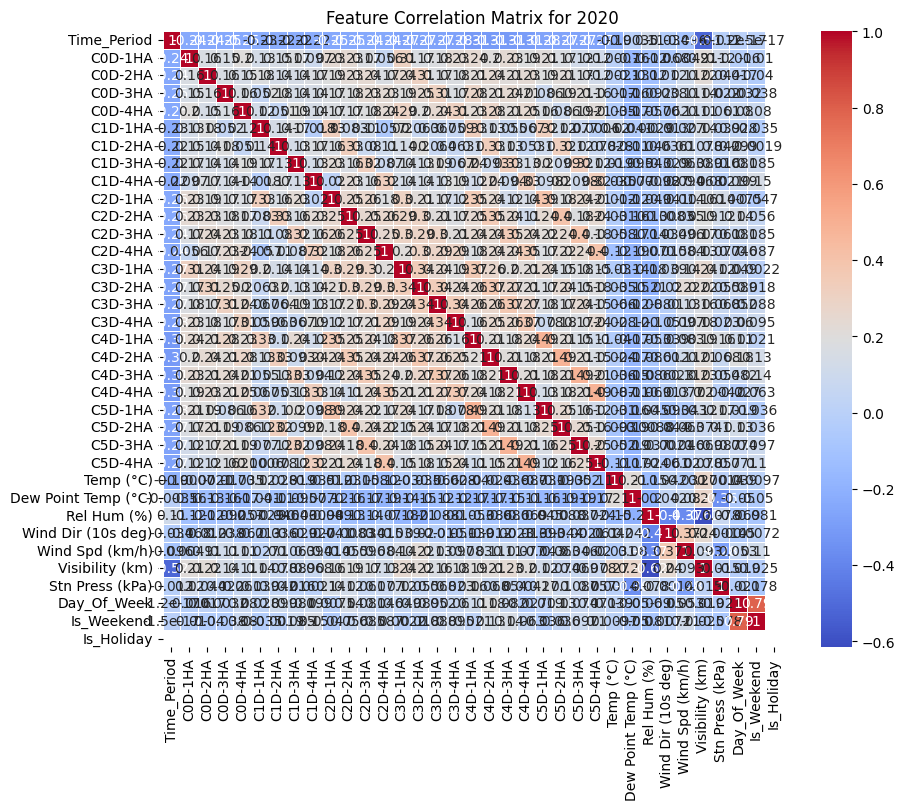


Feature Importances for 2021:
Time_Period: 0.0692
Dew Point Temp (°C): 0.0531
Rel Hum (%): 0.0514
Visibility (km): 0.0501
Stn Press (kPa): 0.0478
Temp (°C): 0.0477
Wind Dir (10s deg): 0.0474
Wind Spd (km/h): 0.0465
Day_Of_Week: 0.0366
C4D-1HA: 0.0362
C5D-1HA: 0.0327
C4D-3HA: 0.0284
C4D-4HA: 0.0268
C5D-4HA: 0.0266
C2D-1HA: 0.0253
C3D-1HA: 0.0252
C5D-3HA: 0.0250
C2D-2HA: 0.0246
C5D-2HA: 0.0244
C4D-2HA: 0.0237
C3D-2HA: 0.0229
C0D-1HA: 0.0219
C2D-3HA: 0.0219
C3D-4HA: 0.0205
C2D-4HA: 0.0202
C3D-3HA: 0.0201
C0D-3HA: 0.0178
C0D-4HA: 0.0174
C0D-2HA: 0.0168
C1D-1HA: 0.0164
C1D-2HA: 0.0146
C1D-4HA: 0.0144
C1D-3HA: 0.0134
Is_Weekend: 0.0133
Is_Holiday: 0.0000

Highly Correlated Features for 2021:


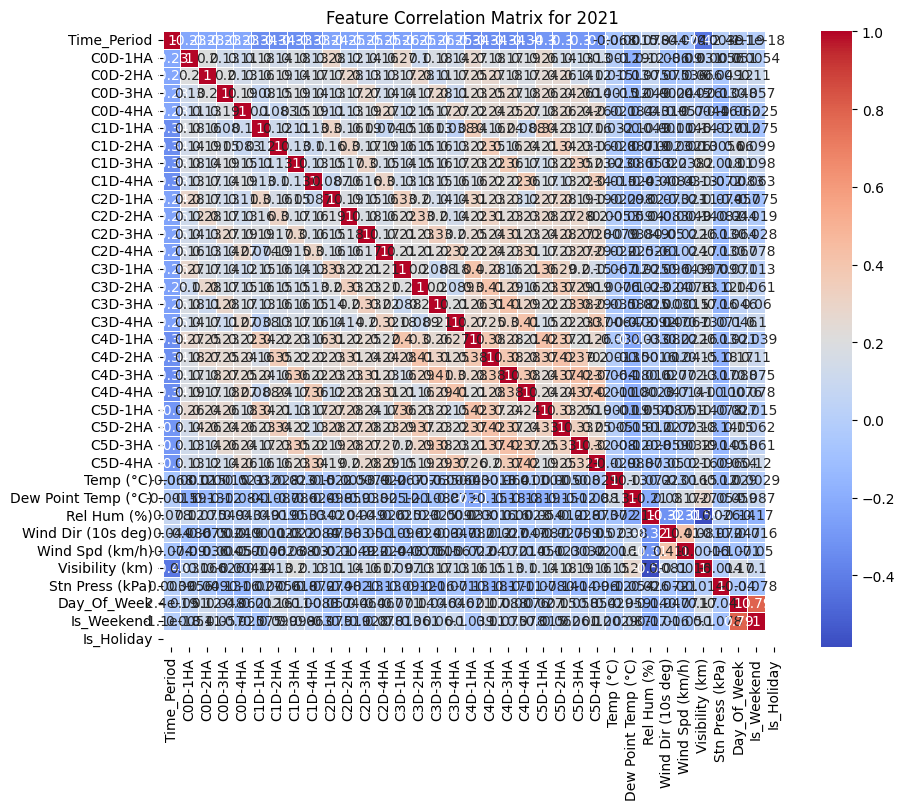


Feature Importances for 2022:
Time_Period: 0.0748
Visibility (km): 0.0501
Dew Point Temp (°C): 0.0475
Temp (°C): 0.0469
Rel Hum (%): 0.0469
Wind Dir (10s deg): 0.0469
Wind Spd (km/h): 0.0456
Stn Press (kPa): 0.0452
C5D-1HA: 0.0441
Day_Of_Week: 0.0359
C4D-1HA: 0.0327
C5D-2HA: 0.0295
C4D-2HA: 0.0289
C3D-1HA: 0.0275
C4D-4HA: 0.0268
C5D-3HA: 0.0263
C0D-1HA: 0.0259
C4D-3HA: 0.0251
C3D-3HA: 0.0235
C3D-2HA: 0.0222
C5D-4HA: 0.0218
C0D-2HA: 0.0214
C2D-2HA: 0.0213
C3D-4HA: 0.0203
C2D-1HA: 0.0198
C2D-3HA: 0.0195
C2D-4HA: 0.0189
C0D-4HA: 0.0179
C1D-1HA: 0.0172
C1D-4HA: 0.0169
C0D-3HA: 0.0150
C1D-3HA: 0.0141
C1D-2HA: 0.0123
Is_Weekend: 0.0112
Is_Holiday: 0.0000

Highly Correlated Features for 2022:


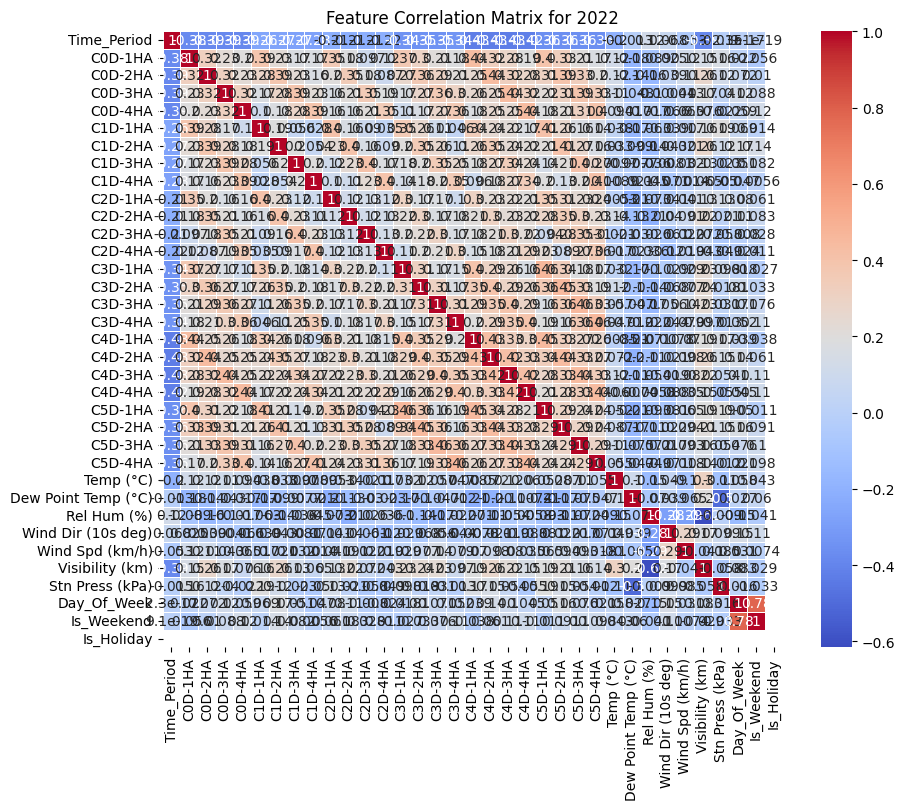


Feature Importances for 2023:
Time_Period: 0.0775
Dew Point Temp (°C): 0.0491
Rel Hum (%): 0.0481
Stn Press (kPa): 0.0478
Temp (°C): 0.0459
Wind Spd (km/h): 0.0445
Visibility (km): 0.0437
Wind Dir (10s deg): 0.0435
C5D-1HA: 0.0375
Day_Of_Week: 0.0354
C4D-1HA: 0.0346
C4D-2HA: 0.0289
C5D-3HA: 0.0272
C3D-3HA: 0.0266
C4D-3HA: 0.0262
C5D-2HA: 0.0261
C2D-3HA: 0.0248
C3D-1HA: 0.0247
C5D-4HA: 0.0246
C2D-1HA: 0.0243
C4D-4HA: 0.0237
C3D-2HA: 0.0214
C0D-1HA: 0.0213
C2D-4HA: 0.0213
C2D-2HA: 0.0210
C0D-3HA: 0.0208
C0D-2HA: 0.0208
C3D-4HA: 0.0203
C0D-4HA: 0.0183
C1D-4HA: 0.0157
C1D-2HA: 0.0146
C1D-1HA: 0.0141
C1D-3HA: 0.0135
Is_Weekend: 0.0121
Is_Holiday: 0.0000

Highly Correlated Features for 2023:


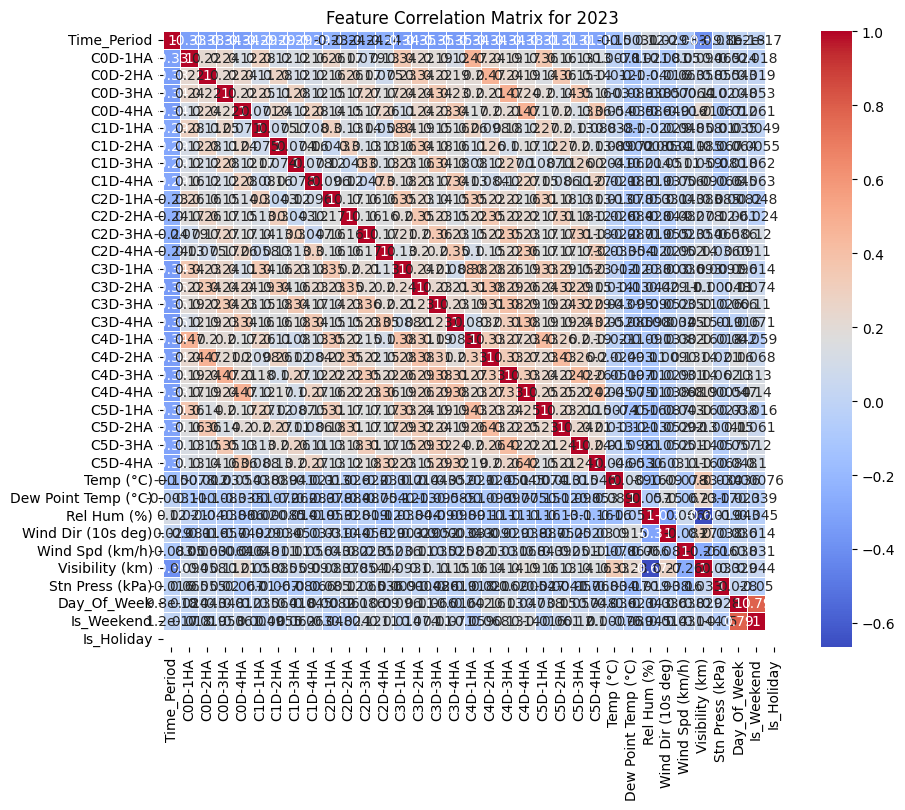

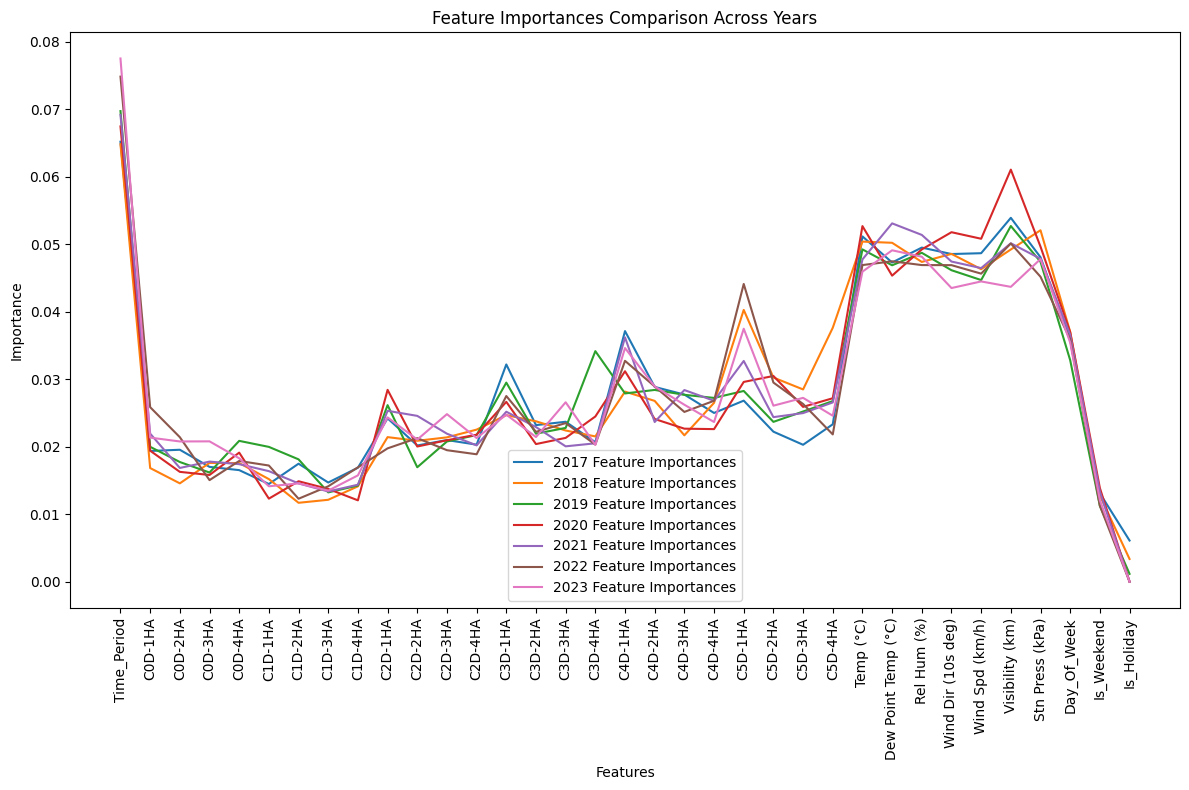

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Step 1: Load All Datasets
all_files = sorted(glob.glob("xydata_*winter.csv"))  # Load all CSV files matching pattern

# Dictionary to store each year's dataset
data_dict = {}

for file in all_files:
    # Extract the year from the filename (e.g., 2017 from xydata_2017winter.csv)
    year = file.split('_')[1][:4]
    data_dict[year] = pd.read_csv(file)

print("All datasets loaded.")

# Step 2: Define Target and Features for Each Year
target_columns_clusters = [f"Cluster{i}" for i in range(6)]  # Target variables
columns_to_drop = target_columns_clusters + ["Date", "Total_Accidents"]  # Non-predictive columns

# Store feature importances and correlation matrices for each year
feature_importances_dict = {}
correlation_dict = {}

for year, data in data_dict.items():
    # Extract target and features
    y = data[target_columns_clusters]  # Binary target
    X = data.drop(columns=columns_to_drop)  # Features

    # Step 3: Train Random Forest Classifier to Get Feature Importance
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)

    # Get feature importances and store in dictionary
    feature_importances = rf.feature_importances_
    feature_importances_dict[year] = feature_importances

    # Print feature importances for the current year
    sorted_indices = feature_importances.argsort()[::-1]
    print(f"\nFeature Importances for {year}:")
    for idx in sorted_indices:
        print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

    # Step 4: Calculate and Store Correlation Matrix
    correlation_matrix = X.corr()
    correlation_dict[year] = correlation_matrix

    # Print highly correlated features
    print(f"\nHighly Correlated Features for {year}:")
    for col in correlation_matrix.columns:
        high_corr = correlation_matrix[col][(correlation_matrix[col] > 0.8) & (correlation_matrix[col] < 1.0)]
        if not high_corr.empty:
            for idx, value in high_corr.items():
                print(f"{col} and {idx} have a correlation of {value:.2f}")

    # Plot correlation heatmap for the current year
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Feature Correlation Matrix for {year}')
    plt.show()

# Step 5: Plot Feature Importances for Each Year for Comparison
# Get the feature names from one of the datasets
feature_names = X.columns

plt.figure(figsize=(12, 8))

for year, importances in feature_importances_dict.items():
    plt.plot(feature_names, importances, label=f"{year} Feature Importances")

plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances Comparison Across Years")
plt.legend()
plt.tight_layout()
plt.show()
